In [166]:
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy.stats import binom
from tabulate import tabulate
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1. Binomial Probability Simulation

In [152]:
n = 14
r = 100000
p = 0.5

# Simulation
data1 = pd.DataFrame(npr.uniform(0, 1, size = n*r).reshape(n, r))
data2 = data1 > 0.5
success = data2.apply(np.sum, 0)
svc = success.value_counts()
simulated_p = pd.DataFrame(svc/r)

# Calculate true probabilities
k = list(range(15))
true_p = pd.DataFrame(binom.pmf(k, n = 14, p = 0.5))
df = pd.concat([simulated_p, true_p], axis = 1, sort = True)

print(tabulate (df, headers = ['# Success','simuated p','true p'], tablefmt = 'fancy_grid'))

╒═════════════╤══════════════╤═════════════╕
│   # Success │   simuated p │      true p │
╞═════════════╪══════════════╪═════════════╡
│           0 │      4e-05   │ 6.10352e-05 │
├─────────────┼──────────────┼─────────────┤
│           1 │      0.00093 │ 0.000854492 │
├─────────────┼──────────────┼─────────────┤
│           2 │      0.00542 │ 0.0055542   │
├─────────────┼──────────────┼─────────────┤
│           3 │      0.02244 │ 0.0222168   │
├─────────────┼──────────────┼─────────────┤
│           4 │      0.06223 │ 0.0610962   │
├─────────────┼──────────────┼─────────────┤
│           5 │      0.12079 │ 0.122192    │
├─────────────┼──────────────┼─────────────┤
│           6 │      0.18413 │ 0.183289    │
├─────────────┼──────────────┼─────────────┤
│           7 │      0.20864 │ 0.209473    │
├─────────────┼──────────────┼─────────────┤
│           8 │      0.18309 │ 0.183289    │
├─────────────┼──────────────┼─────────────┤
│           9 │      0.12085 │ 0.122192    │
├─────────

## 2. Function for Calculating Quantiles

In [153]:
def quartile (values):
    n = len(values)
    values_sort = np.sort(values)
    
    if np.issubdtype(values_sort.dtype, np.number) == False: print ('Wrong input')
        
    elif  n%2 == 0 and (n/2)%2 == 0: 
        median = (values_sort[int(n/2 - 1)] + values_sort[int(n/2)])/2
        Q1 = (values_sort[int(n/4 - 1)] + values_sort[int(n/4)])/2
        Q3 = (values_sort[int(n/4*3 - 1)] + values_sort[int(n/4*3)])/2
        maxv = values_sort[int(n - 1)]
        minv = values_sort[0]
        return ([minv, Q1, median, Q3,maxv])
    
    elif ((n%2 == 0) and ((n/2)%2 != 0)): 
        median = (values_sort[int(n/2 - 1)] + values_sort[int(n/2)])/2
        Q1 = values_sort[int((n/2 + 1)/2 - 1)]
        Q3 = values_sort[int(n/2 + (n/2 + 1)/2 - 1)]
        maxv = values_sort[n - 1]
        minv = values_sort[0]
        return ([minv, Q1,median, Q3, maxv])
    
    elif ((n%2!= 0) and (((n - 1)/2)%2 == 0)):
        median = values_sort[int((n + 1)/2 - 1)]
        Q1 = values_sort[int((n - 1)/4)]
        Q3 = values_sort[int(n - (n - 1)/4 - 1)]
        maxv = values_sort[n - 1]
        minv = values_sort[0]
        return ([minv, Q1, median, Q3, maxv])
    
    elif ((n%2!= 0) and (((n - 1)/2)%2 != 0)):
        median = values_sort[int((n + 1)/2 - 1)]
        Q1 = (values_sort[int((n + 1)/4 - 1)] + values_sort[int((n + 1)/4)])/2
        Q3 = (values_sort[int(n-(n + 1)/4 - 1)] + values_sort[int(n - (n + 1)/4)])/2
        maxv = values_sort[n-1]
        minv = values_sort[0]
        return ([minv, Q1, median, Q3, maxv])


data = npr.normal(0,1, size = 1001)
simulated = pd.DataFrame(quartile (data))
true = pd.DataFrame(np.quantile(data, [0, .25, .5, .75,1]))
quantiles = pd.DataFrame(['0%',  '25%',  '50%',  '75%', '100%'])
combined = pd.concat([quantiles, simulated, true], axis = 1, sort = True)

print(tabulate (combined, headers = ['Quantiles','Simualation','True'], tablefmt = 'fancy_grid'))

╒════╤═════════════╤═══════════════╤════════════╕
│    │ Quantiles   │   Simualation │       True │
╞════╪═════════════╪═══════════════╪════════════╡
│  0 │ 0%          │    -2.99498   │ -2.99498   │
├────┼─────────────┼───────────────┼────────────┤
│  1 │ 25%         │    -0.665912  │ -0.665912  │
├────┼─────────────┼───────────────┼────────────┤
│  2 │ 50%         │    -0.0259208 │ -0.0259208 │
├────┼─────────────┼───────────────┼────────────┤
│  3 │ 75%         │     0.684899  │  0.684899  │
├────┼─────────────┼───────────────┼────────────┤
│  4 │ 100%        │     3.67324   │  3.67324   │
╘════╧═════════════╧═══════════════╧════════════╛


## 3. Function for Calculating Simple Linear Regression Results

In [161]:
def Reg (x,y):
    n = len(x)
    xy = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    xx = np.sum((x - np.mean(x))**2)
    beta1 = xy/xx
    beta0 = np.mean(y) - beta1 * np.mean(x)
    SSE = np.sum((beta0 + (beta1 * x) - y)**2)
    ypred = beta0 + (beta1 * x)
    resid = y - ypred
    sderror = math.sqrt((1/(n - 2))*(np.sum((y - ypred)**2)/np.sum((x - np.mean(x))**2)))
    tscore = beta1/sderror
    pvalue = (1 - stats.t.cdf(math.sqrt((tscore)**2),df = 22))*2

    return{"beta0": beta0.round(2), "beta1": beta1.round(2), "SSE": SSE.round(2),
           "p-value": pvalue.round(5), "residual": resid.round(2)}

### Generate Data

In [162]:
npr.seed(1)
x = (np.arange(10) + 1)
y = 3 + (x*1) + npr.normal(size = 10)

### Fit Simple Linear Regression Model

In [163]:
x1 = x.reshape(-1, 1)
X = sm.add_constant(x)
model = sm.OLS(y, X)
model_fit = model.fit()
import warnings
warnings.filterwarnings('ignore')
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     43.45
Date:                Mon, 22 May 2023   Prob (F-statistic):           0.000171
Time:                        23:57:55   Log-Likelihood:                -15.895
No. Observations:                  10   AIC:                             35.79
Df Residuals:                       8   BIC:                             36.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1104      0.906      3.434      0.0

### Results from Model

In [164]:
lm = LinearRegression()
lm.fit(x1, y)
print ("Results from the model:")
beta0_model = lm.intercept_.round(2)
print("beta0:", beta0_model)

beta1_model = lm.coef_.round(2)
print("beta1:", beta1_model)

pred = lm.predict(x1)
SSE_model = np.sum((y - lm.predict(x1))**2).round(2)
print("SSE:", SSE_model)

resid_model = (y - lm.predict(x1)).round(2)
print("Residuals:", resid_model)

LinearRegression()

Results from the model:
beta0: 3.11
beta1: [0.96]
SSE: 14.06
Residuals: [ 1.55 -0.65 -0.53 -1.03  0.94 -2.19  1.9  -0.57  0.55  0.02]


### Results from Calculations

In [167]:
Reg(x,y)

{'beta0': 3.11,
 'beta1': 0.96,
 'SSE': 14.06,
 'p-value': 0.0,
 'residual': array([ 1.55, -0.65, -0.53, -1.03,  0.94, -2.19,  1.9 , -0.57,  0.55,
         0.02])}

### Compare Results

In [168]:
value_calculated = pd.DataFrame(Reg(x,y).values()).iloc[0:3, :]
value_model = pd.DataFrame([beta0_model, beta1_model, SSE_model])

Result = pd.DataFrame(['Beta0',  'Beta1',  'SSE'])
combined = pd.concat([Result, value_calculated, value_model], axis = 1, sort = True)
print(tabulate (combined, headers = ['Result','Calculation','Model'], tablefmt = 'fancy_grid'))

# The results from the calculations and the model are the same

╒════╤══════════╤═══════════════╤═════════╕
│    │ Result   │   Calculation │   Model │
╞════╪══════════╪═══════════════╪═════════╡
│  0 │ Beta0    │          3.11 │    3.11 │
├────┼──────────┼───────────────┼─────────┤
│  1 │ Beta1    │          0.96 │    0.96 │
├────┼──────────┼───────────────┼─────────┤
│  2 │ SSE      │         14.06 │   14.06 │
╘════╧══════════╧═══════════════╧═════════╛


## 4. Simulation of Brownian Motion

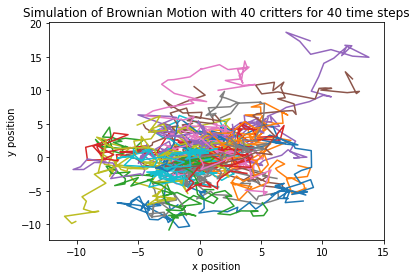

In [169]:
def nemamove  (T,n):
    xdelta=pd.DataFrame(npr.normal(size=T*n).reshape((n,T))) 
    ydelta=pd.DataFrame(npr.normal(size=T*n).reshape((n,T)))
    xdelta.iloc[:,0]=0
    ydelta.iloc[:,0]=0
    xdis=xdelta.apply(np.cumsum,1)
    ydis=ydelta.apply(np.cumsum,1)
    plt.figure()
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.title("Simulation of Brownian Motion with " + str(n) + " critters for " + str(T) +" time steps" )
   
    for g in np.arange(n):
        plt.plot(xdis.iloc[g,:],ydis.iloc[g,:])
    return

nemamove(40,40)